# 1. Pakiety

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

# 2. Dane

In [2]:
df27 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-27.csv')
df27.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-27 04:27:22,2811,Muzeum Lotnictwa,4,Bronowice Małe,2018-07-27 04:26:00,6.352185e+18,6351558574046297346,STOPPING,1,15.0
1,1,2018-07-27 04:27:25,388,Dunikowskiego,52,Czerwone Maki P+R,2018-07-27 04:27:00,6.352185e+18,6351558574046854402,STOPPING,0,4.0
2,2,2018-07-27 04:27:48,388,Dunikowskiego,21,Os.Piastów,2018-07-27 04:26:00,NaN,6351558574046702850,PLANNED,1,9.0
3,2,2018-07-27 04:27:52,459,Kombinat,22,Borek Fałęcki,2018-07-27 04:26:00,NaN,6351558574046719234,PLANNED,1,5.0
4,3,2018-07-27 04:28:12,408,Rondo Czyżyńskie,10,Łagiewniki,2018-07-27 04:26:00,6.352185e+18,6351558574046485762,PREDICTED,2,8.0


# Rozkład spóźnień

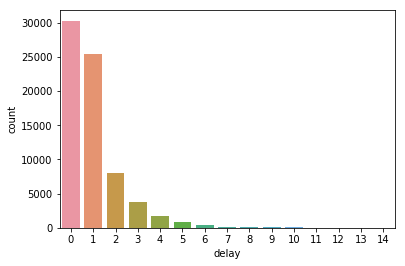

In [3]:
sns.countplot(x='delay', data=df27)

In [4]:
df27.delay.value_counts()

0     30265
1     25344
2      7946
3      3698
4      1711
5       819
6       367
7       185
8       134
9        58
10       57
11       27
12       15
13       11
14        3
Name: delay, dtype: int64

In [5]:
df27.delay.value_counts(normalize = True)

0     0.428440
1     0.358777
2     0.112486
3     0.052350
4     0.024221
5     0.011594
6     0.005195
7     0.002619
8     0.001897
9     0.000821
10    0.000807
11    0.000382
12    0.000212
13    0.000156
14    0.000042
Name: delay, dtype: float64

In [6]:
df27.delay.describe()

count    70640.000000
mean         0.985164
std          1.296983
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: delay, dtype: float64

# Spóźnienia w czasie

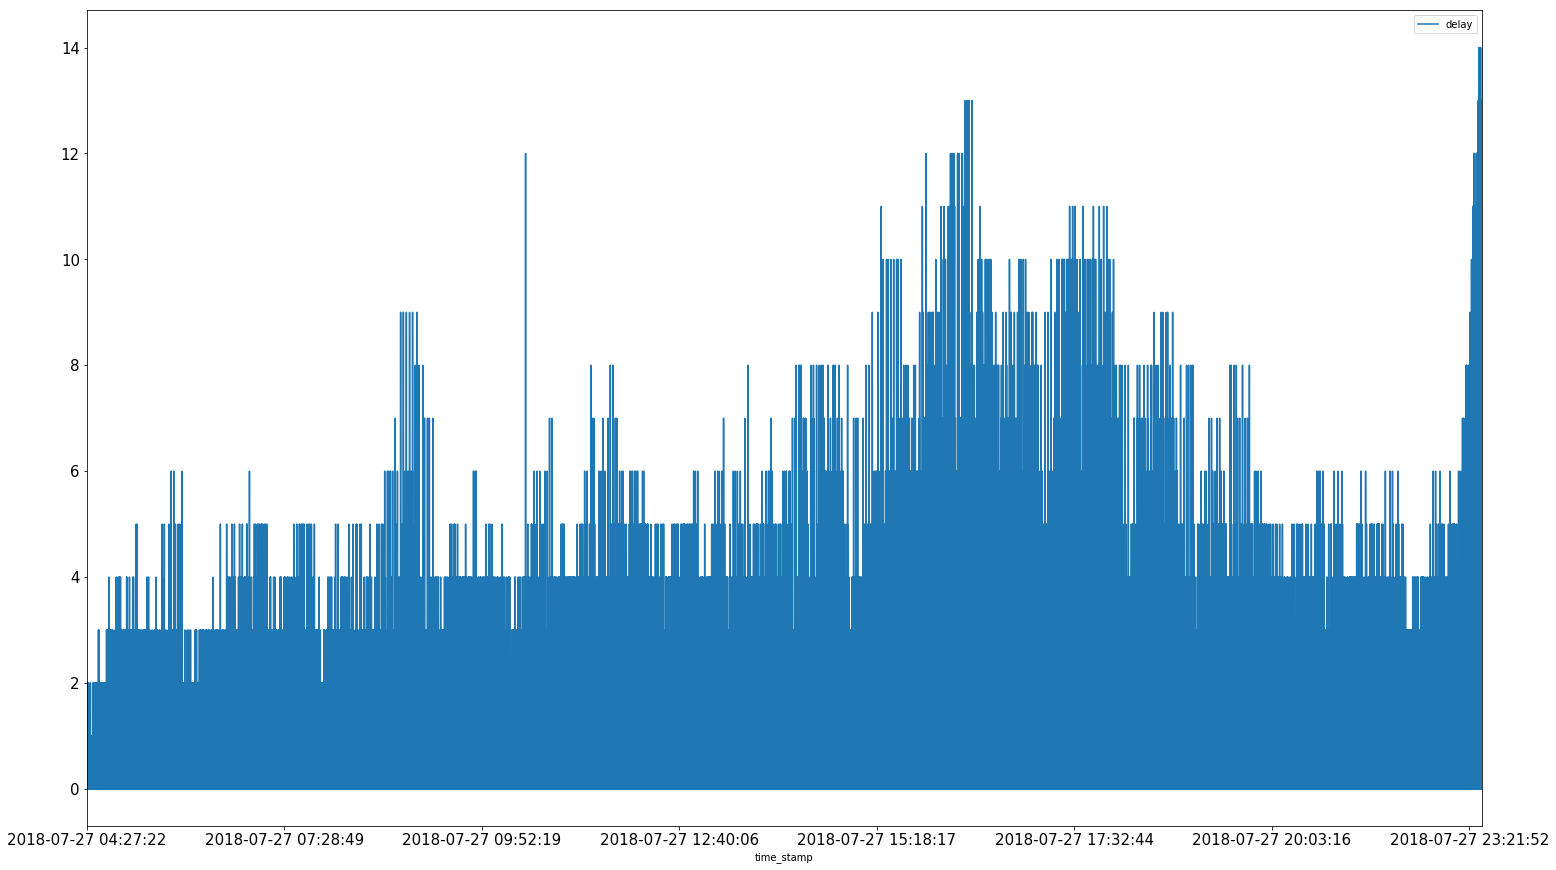

In [7]:
df27.plot(x='time_stamp', y='delay', kind='line', figsize=(25,15), fontsize=15)

# Rankingi spóźnień na przystankach

In [8]:
stopMeanDelay = df27.groupby('stopName').delay.mean().reset_index(name='stopMeanDelay')

In [9]:
stopMeanDelay

,stopName,stopMeanDelay
0,AWF,0.949045
1,Agencja Kraków Wschód,1.154639
2,Bardosa,0.627027
3,Batorego,1.393140
4,Białucha,1.015528
5,Bieńczycka,0.533128
6,Bieżanowska,1.127943
7,Biprostal,0.938992
8,Blokowa,1.131313
9,Borek Fałęcki,0.179641


In [10]:
stopMeanDelay.describe()

,stopMeanDelay
count,153.000000
mean,0.919385
std,0.376033
min,0.019048
25%,0.720798
50%,0.906061
75%,1.123847
max,1.955882


In [11]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False)

,stopName,stopMeanDelay
75,Nowosądecka,1.955882
150,Łagiewniki ZUS,1.891429
88,Piaski Nowe,1.819767
29,Dauna,1.767045
48,Kabel,1.688541
31,Dworcowa,1.645963
22,Cmentarz Podgórski,1.591022
143,Witosa,1.589342
152,Św.Wawrzyńca,1.552083
95,Plaza,1.514905


In [12]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False).head(10)

,stopName,stopMeanDelay
75,Nowosądecka,1.955882
150,Łagiewniki ZUS,1.891429
88,Piaski Nowe,1.819767
29,Dauna,1.767045
48,Kabel,1.688541
31,Dworcowa,1.645963
22,Cmentarz Podgórski,1.591022
143,Witosa,1.589342
152,Św.Wawrzyńca,1.552083
95,Plaza,1.514905


In [13]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=True).head(10)

,stopName,stopMeanDelay
23,Cmentarz Rakowicki,0.019048
20,Cichy Kącik,0.041667
67,Mały Płaszów,0.115108
14,Bronowice Małe,0.116105
25,Czerwone Maki P+R,0.126531
102,Rakowicka,0.132075
134,Uniwersytet Ekonomiczny,0.150943
59,Krowodrza Górka,0.154321
9,Borek Fałęcki,0.179641
145,Wzgórza Krzesławickie,0.204545


# Ranking spóźnień dla danych linii

In [14]:
lineMeanDelay = df27.groupby(['number', 'direction']).delay.mean().reset_index(name='lineMeanDelay')

In [15]:
lineMeanDelay

,number,direction,lineMeanDelay
0,1,Salwator,0.676083
1,1,Wzgórza K.,0.892157
2,2,Cm. Rakowicki,0.262452
3,2,Salwator,0.289431
4,3,Dworzec Tow.,0.547826
5,3,Krowodrza Górka,0.730058
6,3,Nowy Bieżanów P+R,1.158263
7,4,Bronowice Małe,0.445732
8,4,Kombinat,1.153846
9,4,Wzgórza K.,0.844619


In [16]:
lineMeanDelay.sort_values(by='lineMeanDelay')

,number,direction,lineMeanDelay
2,2,Cm. Rakowicki,0.262452
3,2,Salwator,0.289431
20,11,Czerwone Maki P+R,0.411924
7,4,Bronowice Małe,0.445732
4,3,Dworzec Tow.,0.547826
33,20,Cichy Kącik,0.558182
10,5,Krowodrza Górka,0.568709
29,18,Czerwone Maki P+R,0.574262
17,9,Nowy Bieżanów P+R,0.601966
19,10,Łagiewniki,0.651976


In [17]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=False).head(10)

,number,direction,lineMeanDelay
40,22,Walcownia,1.845657
41,24,Bronowice Małe,1.700237
31,19,Borek Fałęcki,1.573589
42,24,Kurdwanów P+R,1.540914
13,6,Salwator,1.533208
47,50,Prokocim,1.396602
23,13,Nowy Bieżanów P+R,1.366318
18,10,Kopiec Wandy,1.335423
24,14,Bronowice Małe,1.230521
38,22,Borek Fałęcki,1.213123


In [18]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=True).head(10)

,number,direction,lineMeanDelay
2,2,Cm. Rakowicki,0.262452
3,2,Salwator,0.289431
20,11,Czerwone Maki P+R,0.411924
7,4,Bronowice Małe,0.445732
4,3,Dworzec Tow.,0.547826
33,20,Cichy Kącik,0.558182
10,5,Krowodrza Górka,0.568709
29,18,Czerwone Maki P+R,0.574262
17,9,Nowy Bieżanów P+R,0.601966
19,10,Łagiewniki,0.651976


In [19]:
lineMeanDelay['number and direction'] = lineMeanDelay.agg('{0[number]} {0[direction]}'.format, axis=1)

In [20]:
lineMeanDelay

,number,direction,lineMeanDelay,number and direction
0,1,Salwator,0.676083,1 Salwator
1,1,Wzgórza K.,0.892157,1 Wzgórza K.
2,2,Cm. Rakowicki,0.262452,2 Cm. Rakowicki
3,2,Salwator,0.289431,2 Salwator
4,3,Dworzec Tow.,0.547826,3 Dworzec Tow.
5,3,Krowodrza Górka,0.730058,3 Krowodrza Górka
6,3,Nowy Bieżanów P+R,1.158263,3 Nowy Bieżanów P+R
7,4,Bronowice Małe,0.445732,4 Bronowice Małe
8,4,Kombinat,1.153846,4 Kombinat
9,4,Wzgórza K.,0.844619,4 Wzgórza K.


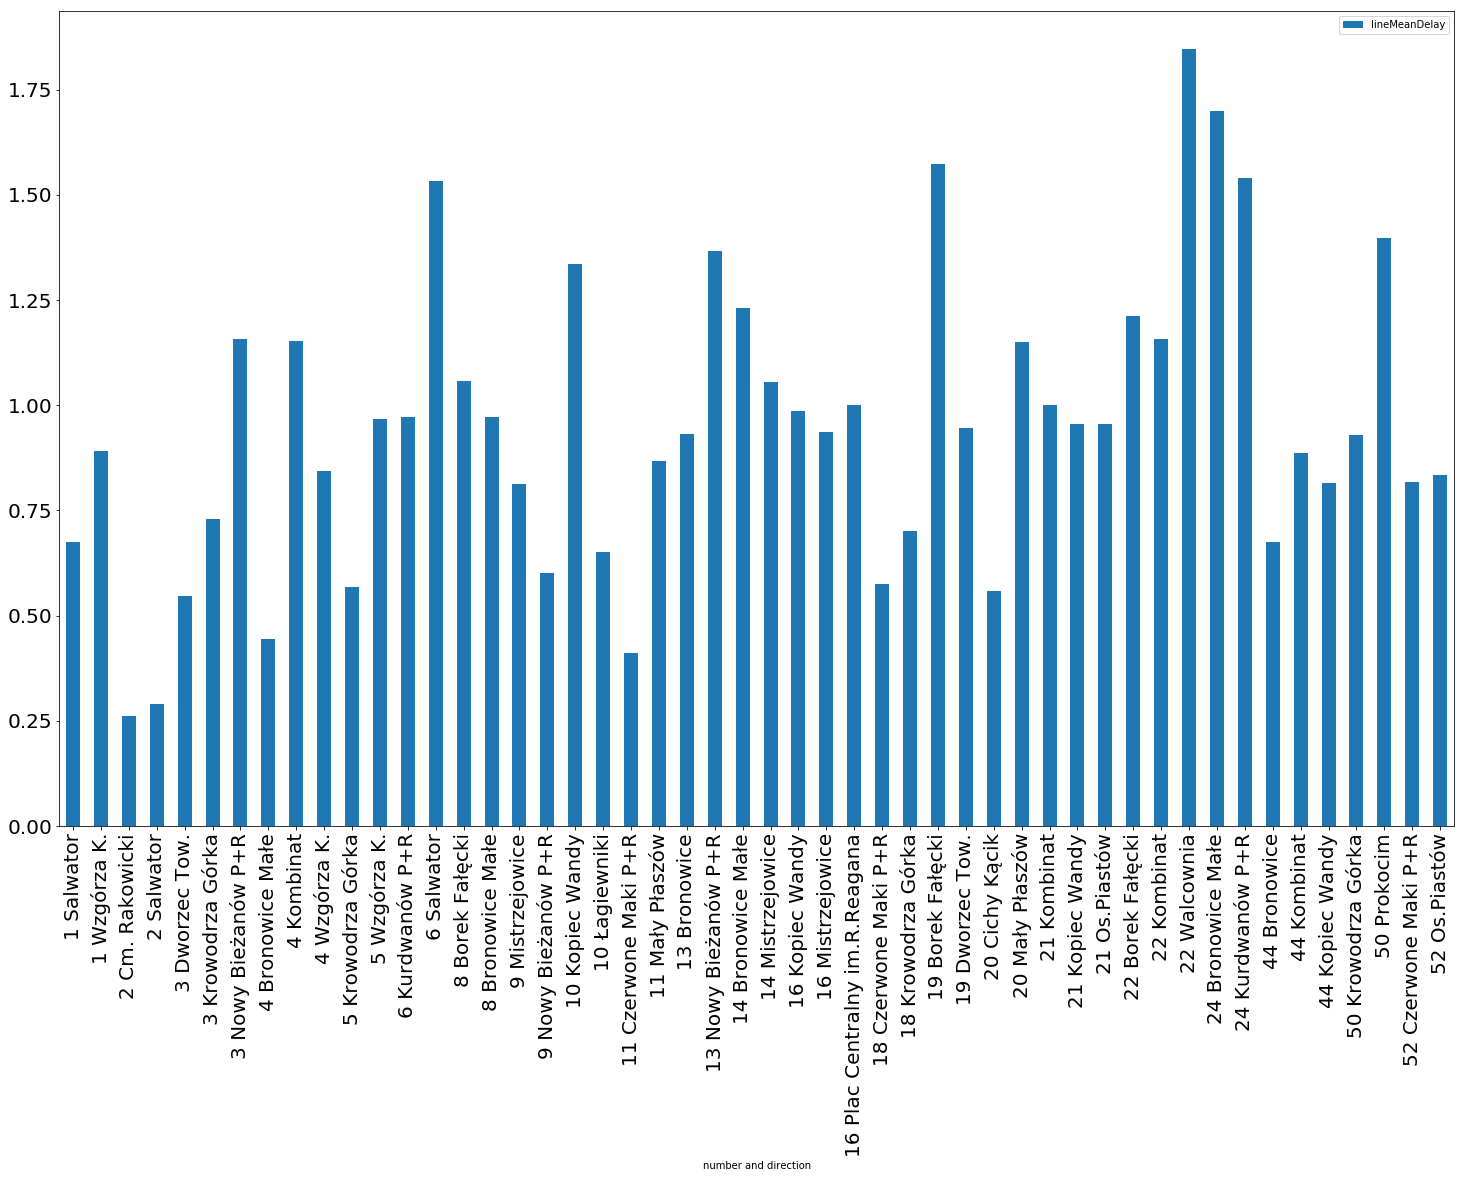

In [21]:
lineMeanDelay.plot(x='number and direction', y='lineMeanDelay', kind='bar', figsize=(25,15), fontsize=20)

# Model uczenia maszynowego

In [22]:
df27.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [23]:
#df27.apply(lambda x: '{} {}'.format(x['number'], x['direction']), axis = 1).head().factorize()[0]

In [24]:
df27['plannedTime'] = pd.to_datetime (df27['plannedTime'])
df27[['plannedTime']].info()

df27['plannedTime'].dt.hour.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70640 entries, 0 to 70639
Data columns (total 1 columns):
plannedTime    70640 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 552.0 KB


15    4502
17    4497
7     4453
16    4433
6     4335
8     4136
9     4062
19    3958
13    3800
11    3742
12    3711
18    3706
14    3690
20    3439
10    3240
5     3081
21    3080
22    2848
23    1416
4      500
0       11
Name: plannedTime, dtype: int64

In [25]:
df27['delay_secs'] = df27['delay'].map(lambda x: x*60)
df27['direction_cat'] = df27['direction'].factorize()[0]
df27['vehicleId'].fillna(-1, inplace = True)
df27['seq_num'].fillna(-1, inplace = True)

def gen_id_num_direction(x):
    return '{} {}'.format(x['number'], x['direction'])
df27['number_direction_id'] = df27.apply(gen_id_num_direction, axis = 1).factorize()[0]

def gen_id_stop_direction(x):
    return '{} {}'.format(x['stop'], x['direction'])
df27['stop_direction_id'] = df27.apply(gen_id_stop_direction, axis = 1).factorize()[0]

feats1 = [
    'number'
]
X1 = df27[ feats1 ].values

feats2 = [
    'number',
    'stop'
]
X2 = df27[ feats2 ].values

feats3 = [
    'number',
    'stop',
    'direction_cat'
]
X3 = df27[ feats3 ].values

feats4 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId'
]
X4 = df27[ feats4 ].values

feats5 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num'
]
X5 = df27[ feats5 ].values

feats6 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id'
]
X6 = df27[ feats6 ].values

feats7 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id'
]
X7 = df27[ feats7 ].values

y = df27['delay_secs'].values


model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_absolute_error')
scores2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_absolute_error')
scores3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_absolute_error')
scores4 = cross_val_score(model, X4, y, cv=5, scoring='neg_mean_absolute_error')
scores5 = cross_val_score(model, X5, y, cv=5, scoring='neg_mean_absolute_error')
scores6 = cross_val_score(model, X6, y, cv=5, scoring='neg_mean_absolute_error')
scores7 = cross_val_score(model, X7, y, cv=5, scoring='neg_mean_absolute_error')

In [26]:
Data = [(abs(np.mean(scores1))),
        (abs(np.mean(scores2))),
        (abs(np.mean(scores3))),
        (abs(np.mean(scores4))),
        (abs(np.mean(scores5))),
        (abs(np.mean(scores6))),
        (abs(np.mean(scores7)))]
        
df27 = pd.DataFrame(Data, index=['feats1','feats2','feats3','feats4','feats5','feats6','feats7'], columns=['np.mean'])

In [27]:
df27

,np.mean
feats1,53.217528
feats2,51.701163
feats3,49.288203
feats4,47.708430
feats5,46.310295
feats6,46.220786
feats7,46.123915


In [28]:
minVal27 = df27.min()
 
print('Minimum value is: ')
print(minVal27)


minValInd27 = df27.idxmin()
 
print("Min value is at row index position:")
print(minValInd27)

Minimum value is: 
np.mean    46.123915
dtype: float64
Min value is at row index position:
np.mean    feats7
dtype: object


In [29]:
feats7

['number',
 'stop',
 'direction_cat',
 'vehicleId',
 'seq_num',
 'number_direction_id',
 'stop_direction_id']

In [30]:
np.std(scores7)

5.699198508609851